In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('log/single.csv')
#df_gpu = pd.read_csv('gpu.csv')
df1 = pd.read_csv('log/node1.csv')
df2 = pd.read_csv('log/node2.csv')

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
#df_gpu['timestamp'] = pd.to_datetime(df_gpu['timestamp'])

df['timestamp'] -= df['timestamp'].min()
df1['timestamp'] -= df1['timestamp'].min()
df2['timestamp'] -= df2['timestamp'].min()
#df_gpu['timestamp'] -= df_gpu['timestamp'].min()

In [22]:
display(df.head())
#display(df_gpu.head())
display(df2.head())
display(df1.head())

,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.171875,2.301704
1,1,1,NaN,NaN,00:00:00.197105,0.046875,2.304430
2,2,2,NaN,NaN,00:00:00.359715,0.046875,2.307965
3,3,3,NaN,NaN,00:00:00.606424,0.109375,2.302052
4,4,4,NaN,NaN,00:00:00.854159,0.078125,2.302787


,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.093750,2.305801
1,1,1,NaN,NaN,00:00:00.213527,0.109375,2.301132
2,2,2,NaN,NaN,00:00:00.475443,0.078125,2.302628
3,3,3,NaN,NaN,00:00:00.653559,0.046875,2.303270
4,4,4,NaN,NaN,00:00:00.829900,0.109375,2.307333


,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.093750,2.306661
1,1,1,NaN,NaN,00:00:00.190590,0.140625,2.295700
2,2,2,NaN,NaN,00:00:00.365993,0.093750,2.304219
3,3,3,NaN,NaN,00:00:00.541843,0.140625,2.301951
4,4,4,NaN,NaN,00:00:00.717492,0.046875,2.308281


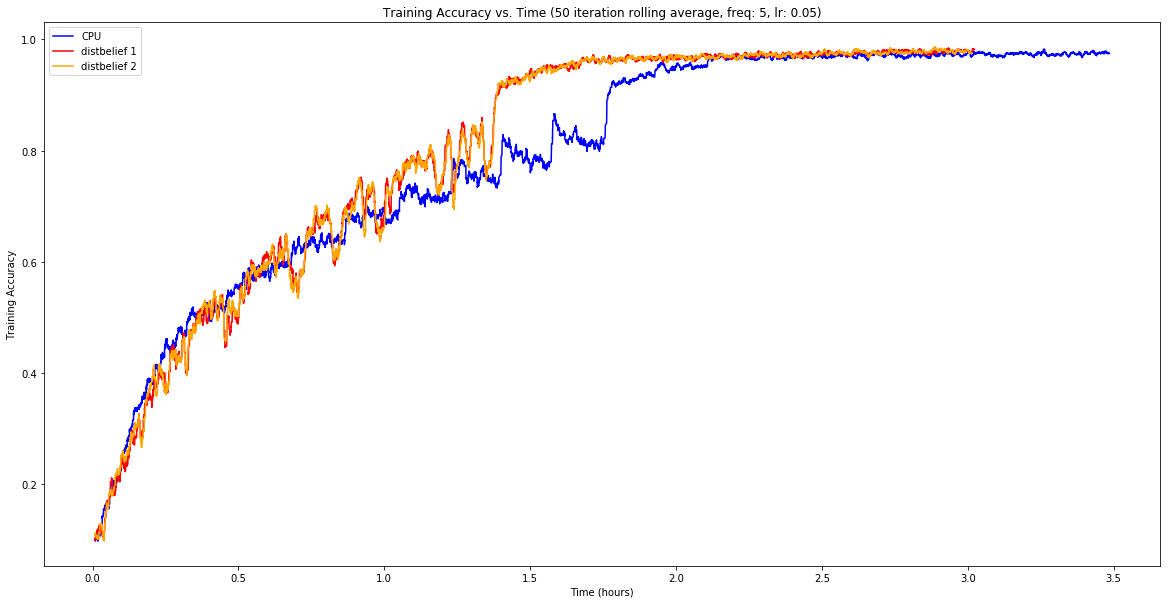

In [27]:
fig = plt.figure(figsize=(20, 10))

#df = df.dropna()
#df1 = df1.dropna()
#df2 = df2.dropna()
#df_gpu = df_gpu.dropna()

plt.plot(df['timestamp'].dt.seconds / 3600.0,df['training_accuracy'].rolling(50).mean(), label='CPU', color='b', )
plt.plot(df1['timestamp'].dt.seconds / 3600.0,df1['training_accuracy'].rolling(50).mean(), label='distbelief 1', color='r')
plt.plot(df2['timestamp'].dt.seconds / 3600.0,df2['training_accuracy'].rolling(50).mean(), label='distbelief 2', color='orange')
#plt.plot(df_gpu['index'],df_gpu['training_accuracy'].rolling(50).mean(), label='GPU ', color='green')

plt.ylabel('Training Accuracy')
plt.xlabel('Time (hours)')
plt.legend()
plt.title("Training Accuracy vs. Time (50 iteration rolling average, freq: 5, lr: 0.05)")
plt.savefig('train_time.png')
plt.show()

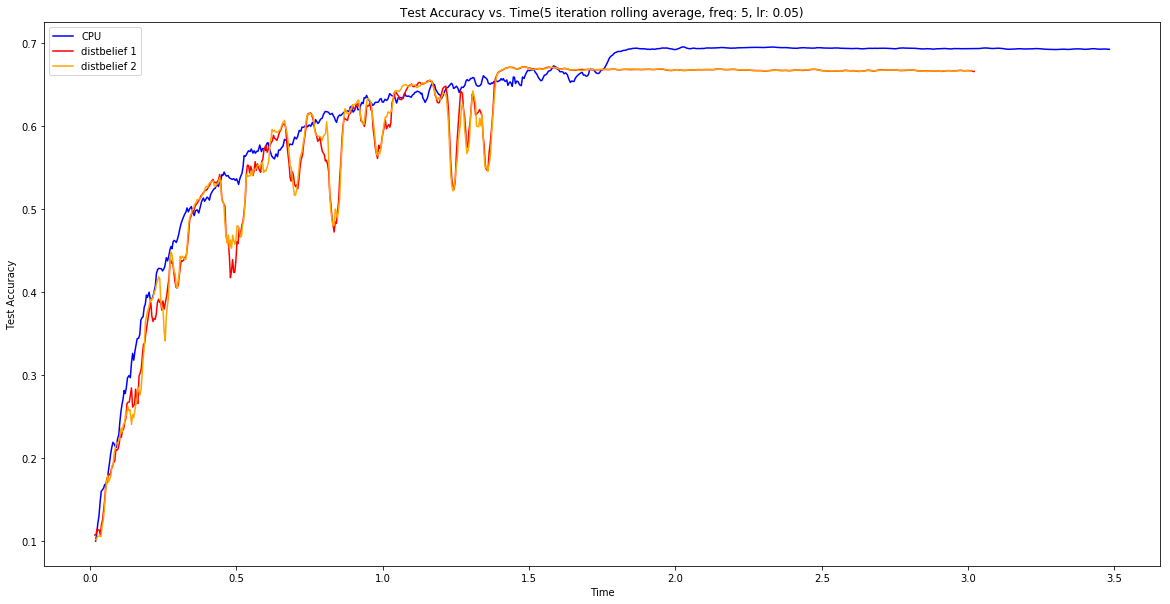

In [28]:
fig = plt.figure(figsize=(20, 10))

plt.plot(df.dropna()['timestamp'].dt.seconds / 3600.0,df.dropna()['test_accuracy'].rolling(5).mean(), label='CPU', color='b', )
plt.plot(df1.dropna()['timestamp'].dt.seconds / 3600.0,df1.dropna()['test_accuracy'].rolling(5).mean(), label='distbelief 1', color='r')
plt.plot(df2.dropna()['timestamp'].dt.seconds / 3600.0,df2.dropna()['test_accuracy'].rolling(5).mean(), label='distbelief 2', color='orange')
#plt.plot(df_gpu['index'],df_gpu['training_accuracy'].rolling(50).mean(), label='GPU ', color='green')

plt.ylabel('Test Accuracy')
plt.xlabel('Time')
plt.legend()
plt.title("Test Accuracy vs. Time(5 iteration rolling average, freq: 5, lr: 0.05)")
plt.savefig('test_time.png')
plt.show()